In [40]:
from dolfin import *
#Meshandfunctionspace
import matplotlib.pyplot as plt
import numpy as np
import GenerateData as gd
import gmsh
import GenerateGraph as gg

In [41]:
!dolfin-convert data/mesh/DD.msh data/mesh/DD.xml

Converting from Gmsh format (.msh, .gmsh) to DOLFIN XML format
Expecting 161 vertices
Found all vertices
Expecting 270 cells
Found all cells
Conversion done


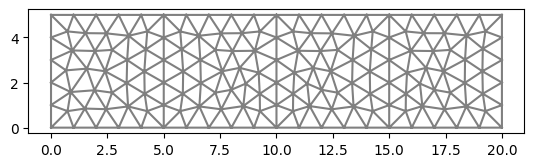

In [42]:
mesh_load = gd.MeshLoader("data/mesh/DD")
mesh = mesh_load.mesh
bounds = mesh_load.bounds
face = mesh_load.face
plot(mesh)

In [43]:
idx = np.where(mesh.coordinates()[:,1] < 3)[0]#and mesh.coordinates()[:,1].any() > 2 )[0]
idx2 = np.where(mesh.coordinates()[:,1] > 2)[0]
idx

array([  0,   2,   4,   6,   8,  10,  11,  12,  13,  18,  19,  20,  21,
        26,  27,  28,  29,  34,  35,  36,  37,  42,  43,  44,  46,  47,
        48,  50,  51,  52,  54,  55,  56,  58,  59,  60,  62,  63,  65,
        66,  67,  69,  70,  75,  76,  77,  79,  81,  83,  84,  86,  88,
        89,  90,  91,  93,  94,  99, 100, 102, 103, 106, 107, 109, 110,
       111, 113, 114, 115, 116, 118, 119, 124, 125, 127, 128, 131, 132,
       134, 135, 136, 137, 139, 140, 141, 143, 144, 148, 150, 152, 153,
       155, 157, 159, 160])

In [44]:
elementi_comuni = np.intersect1d(idx, idx2)

# Stampa gli elementi comuni
print(elementi_comuni)

[ 44  48  52  56  60  62  63  69  79  88  89  93 103 113 114 118 128 136
 137 143 153]


In [45]:
tags = {'walls':[5],'inlet':[6],'outlet':[7], 'interface': [8,9,10], 'faces': [11,12,13,14]}
mesh_load.update_tags(tags)
mesh_load.measure_definition()

(Measure('interior_facet', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 1926), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7f670af17a30>),
 Measure('exterior_facet', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 1926), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7f670af17a30>),
 Measure('cell', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 1926), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7f670ae5bc30>))

Solving linear variational problem.


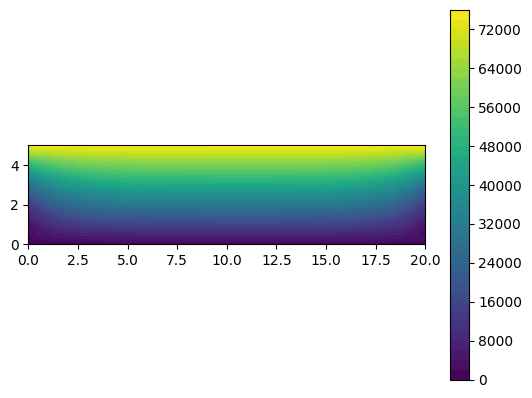

Solving linear variational problem.


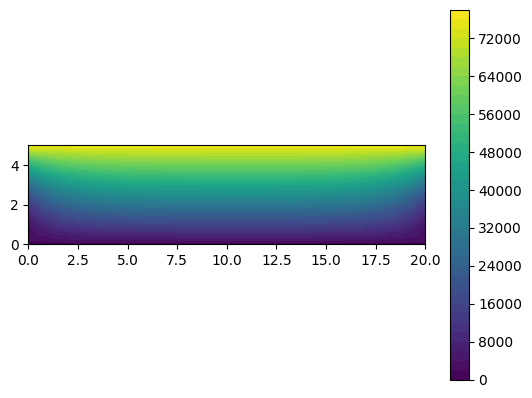

Solving linear variational problem.


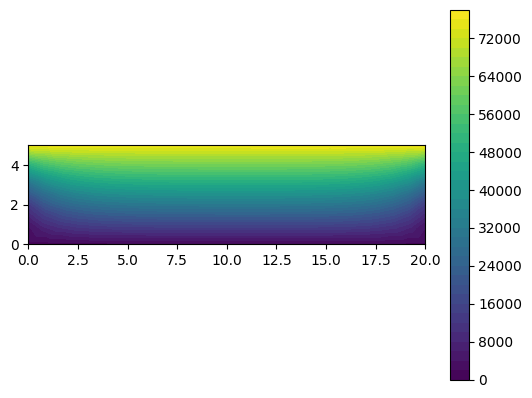

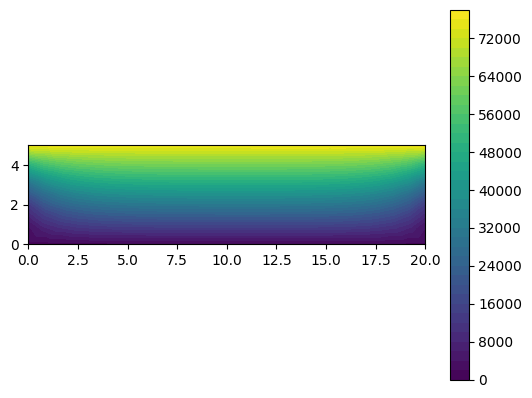

In [46]:
heat = gd.Heat(mesh_load,'Heat')
heat.solve()
heat.plot_solution()

In [47]:
assemble(Constant(1.0)*mesh_load.dx(tags['faces'][1]))

25.0

In [48]:
#data = gd.DataHeat(heat,mesh_load)

In [49]:
# mean = data.mean_temp(tags['faces'][0])
# print(mean)

Solving linear variational problem.


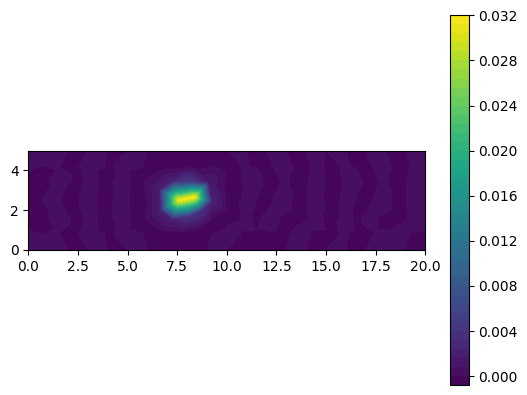

Solving linear variational problem.


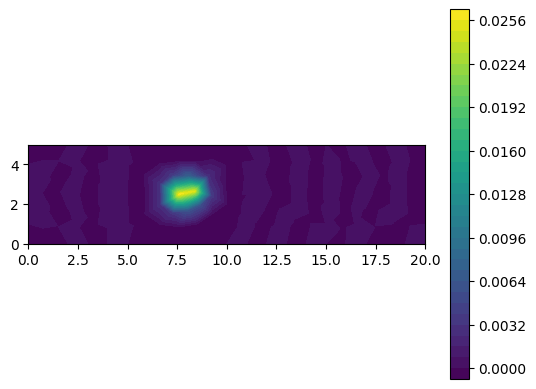

Solving linear variational problem.


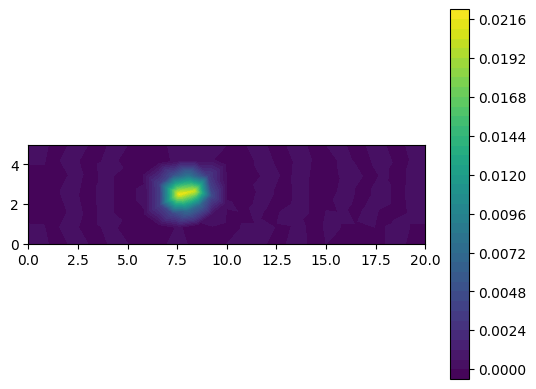

Solving linear variational problem.


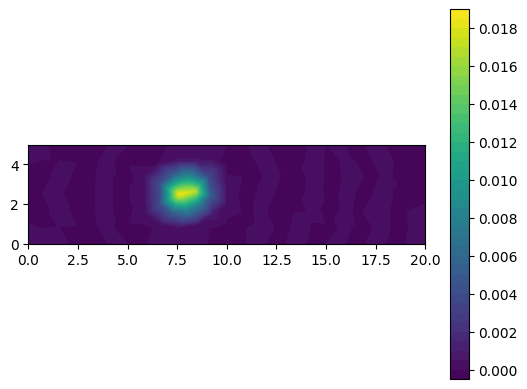

Solving linear variational problem.


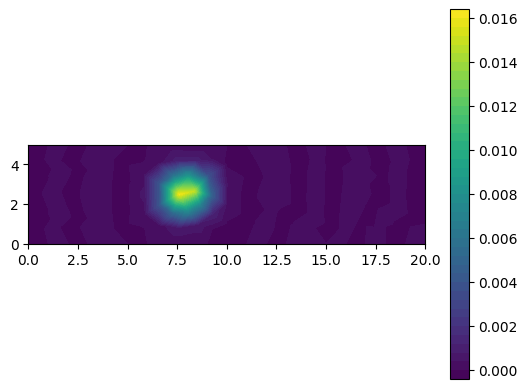

Solving linear variational problem.


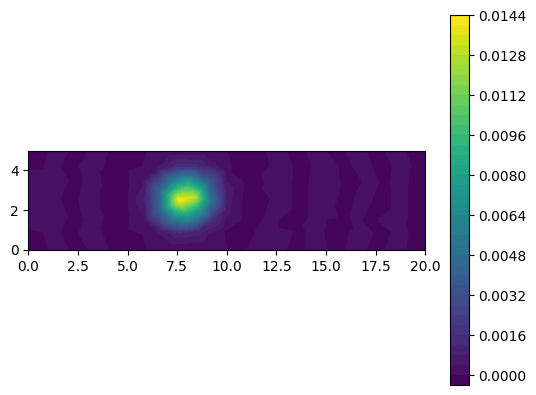

Solving linear variational problem.


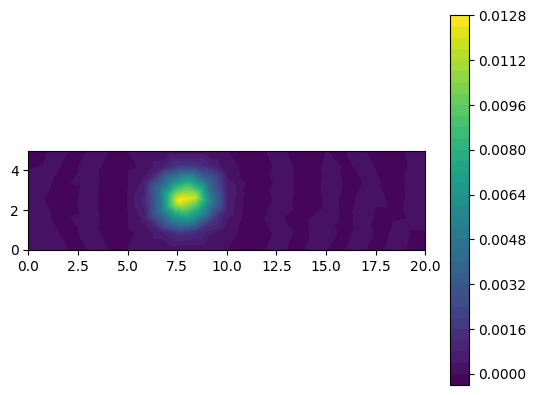

Solving linear variational problem.


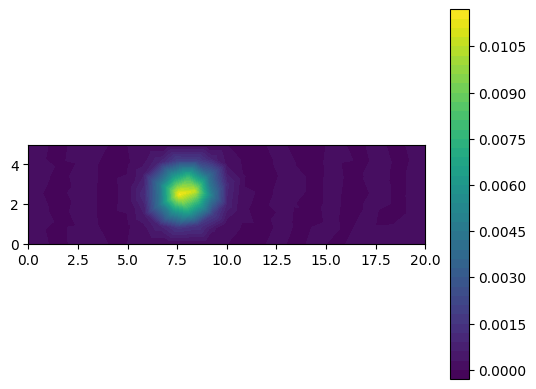

Solving linear variational problem.


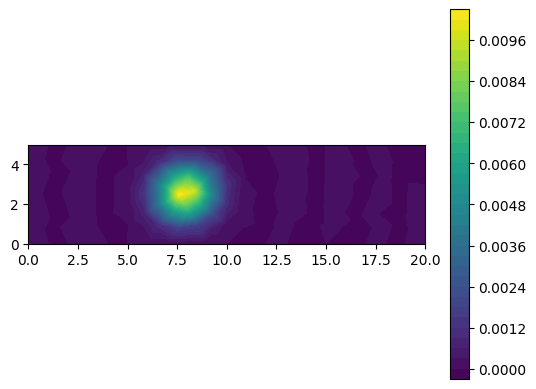

Solving linear variational problem.


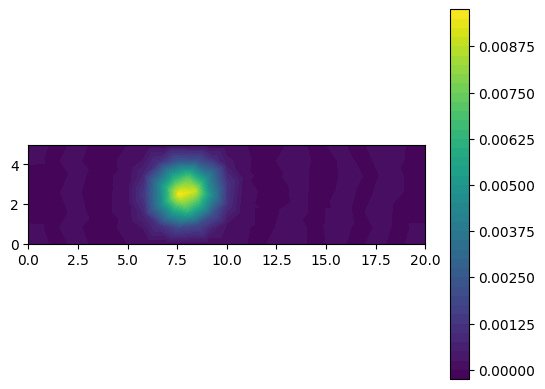

Solving linear variational problem.


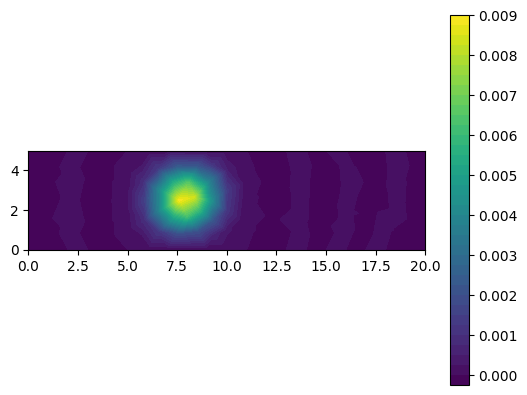

Solving linear variational problem.


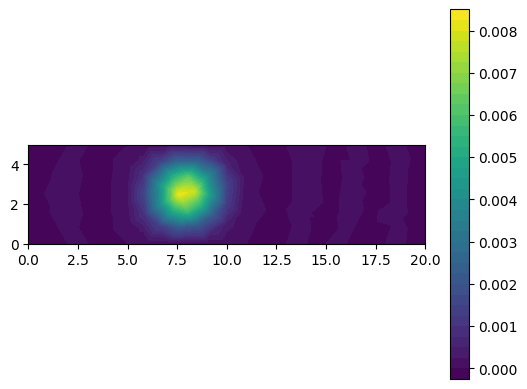

Solving linear variational problem.


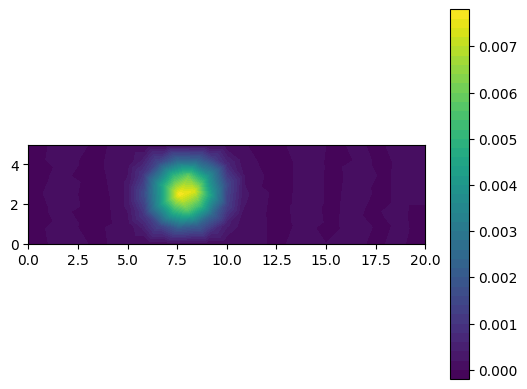

Solving linear variational problem.


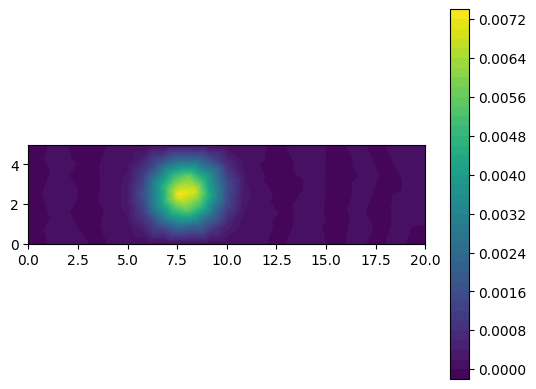

Solving linear variational problem.


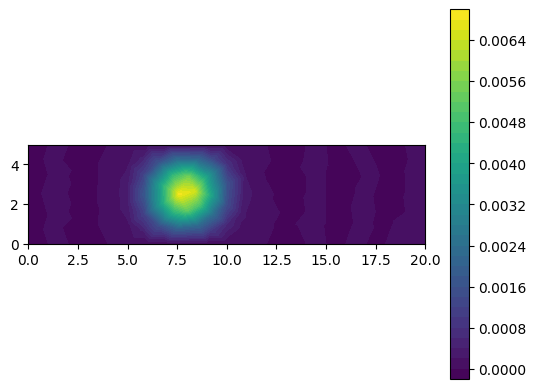

Solving linear variational problem.


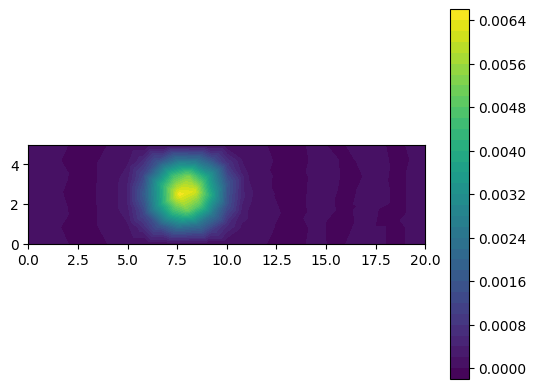

Solving linear variational problem.


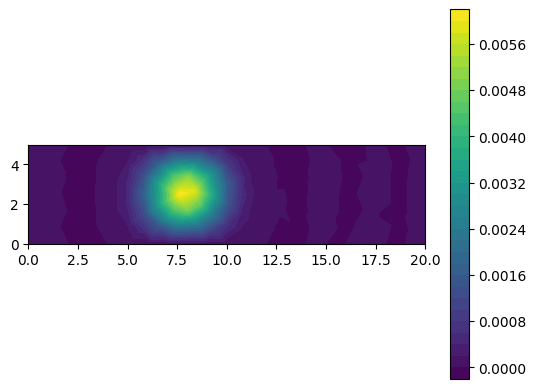

Solving linear variational problem.


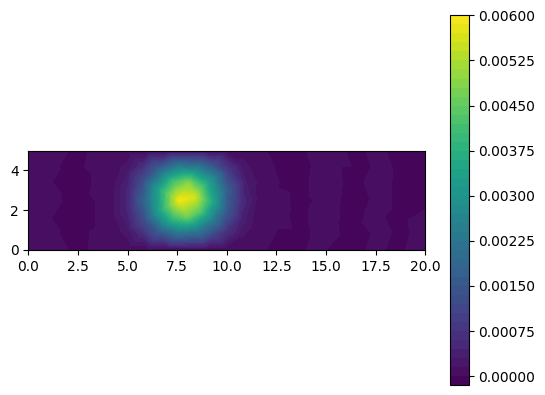

Solving linear variational problem.


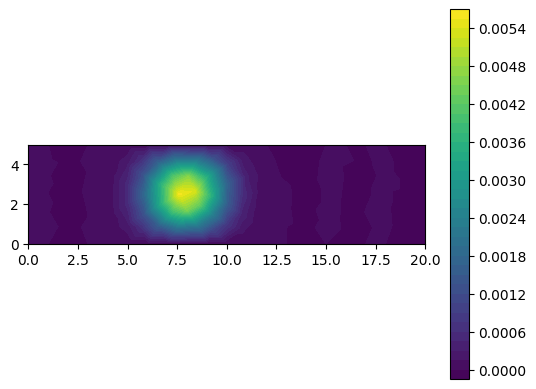

Solving linear variational problem.


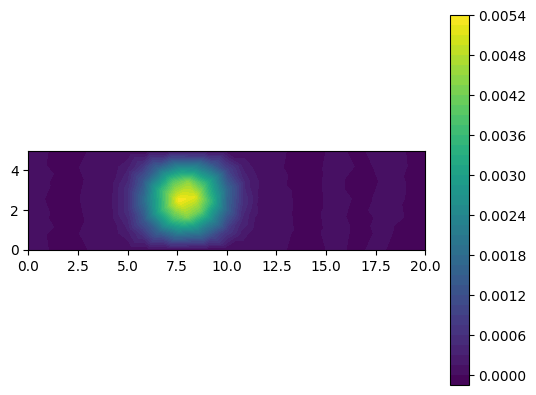

Solving linear variational problem.


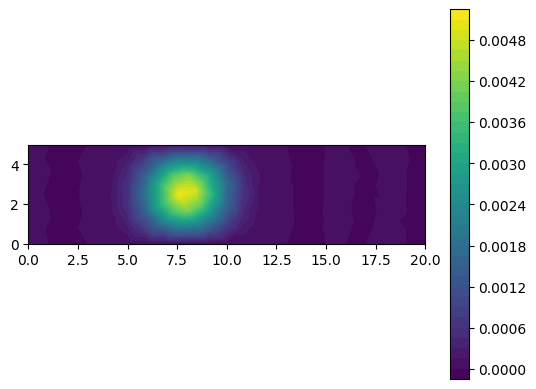

Solving linear variational problem.


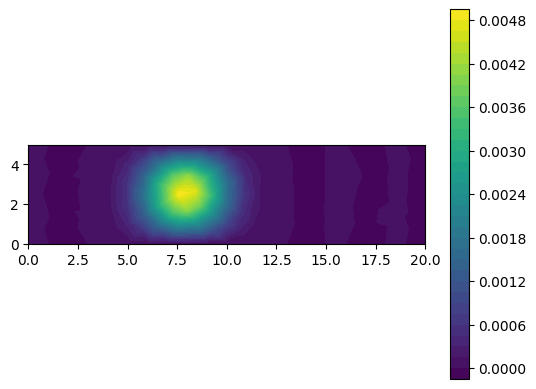

Solving linear variational problem.


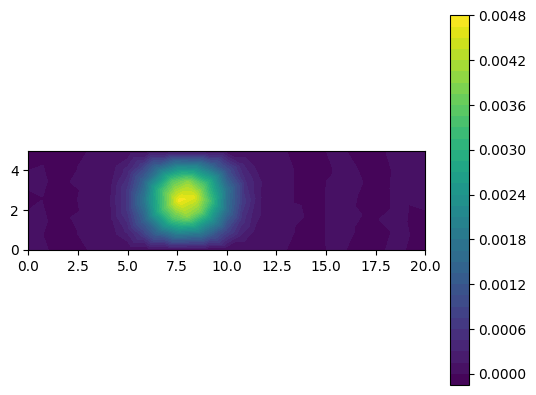

Solving linear variational problem.


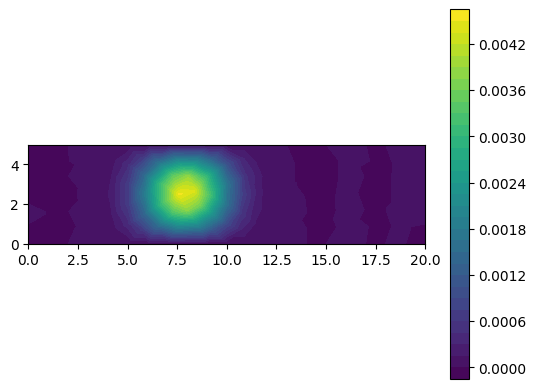

Solving linear variational problem.


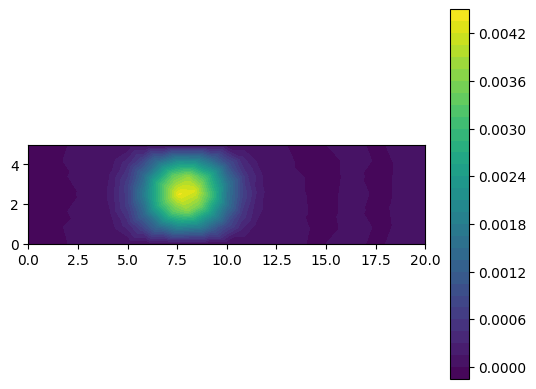

Solving linear variational problem.


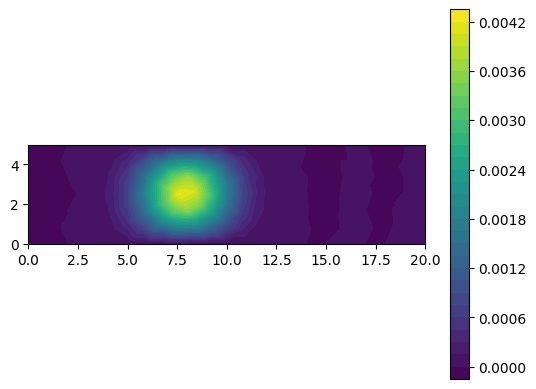

Solving linear variational problem.


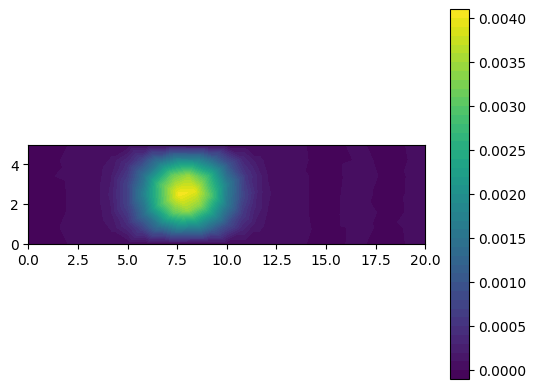

Solving linear variational problem.


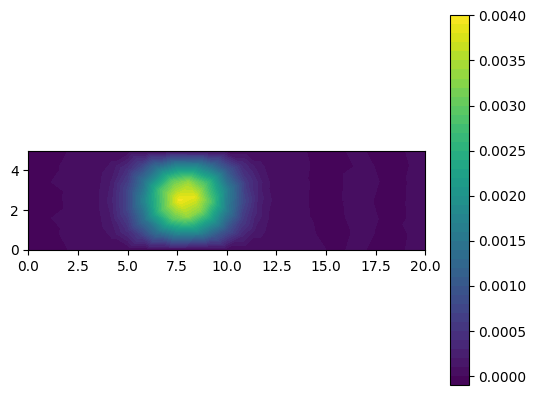

Solving linear variational problem.


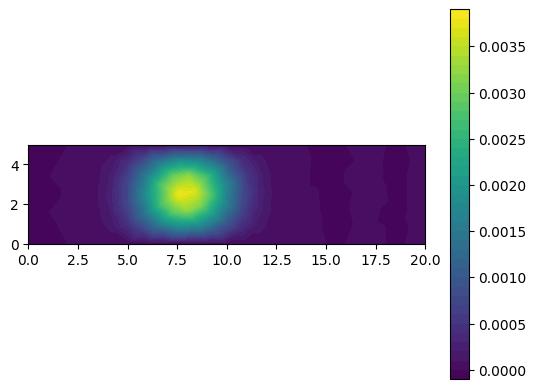

Solving linear variational problem.


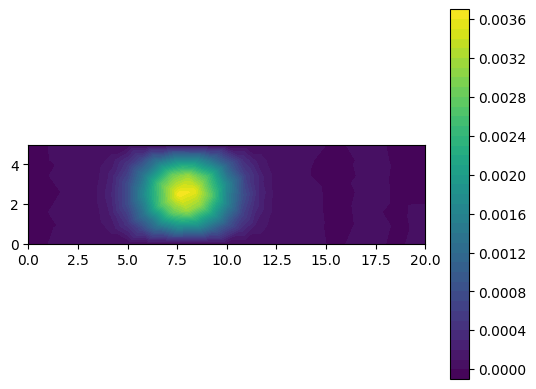

Solving linear variational problem.


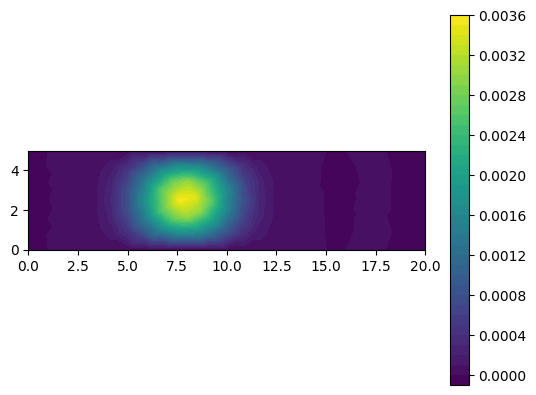

Solving linear variational problem.


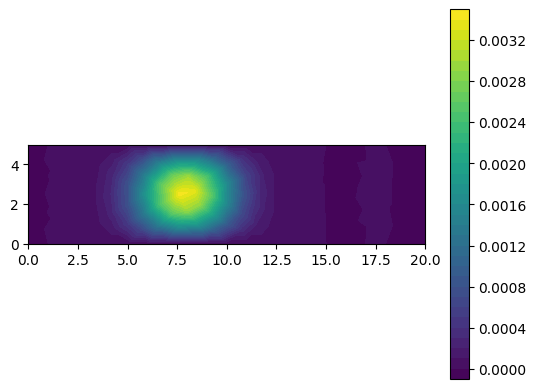

Solving linear variational problem.


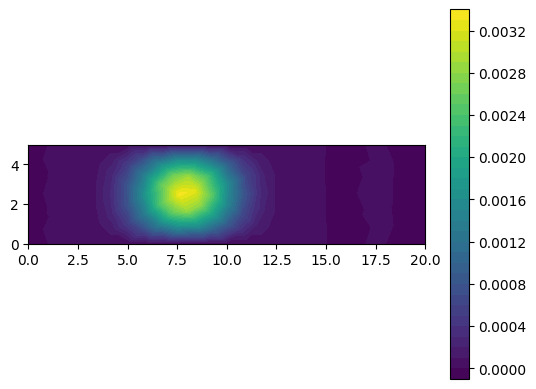

Solving linear variational problem.


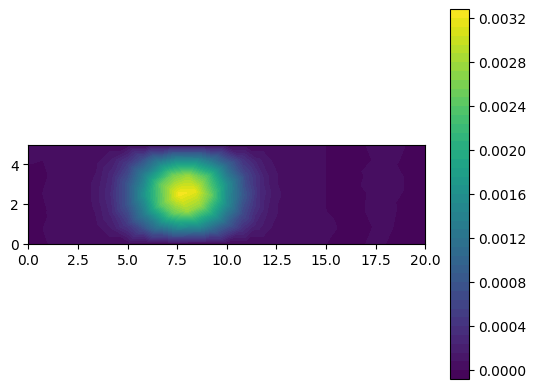

Solving linear variational problem.


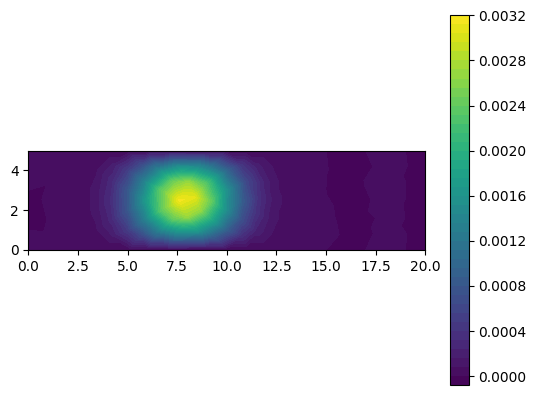

Solving linear variational problem.


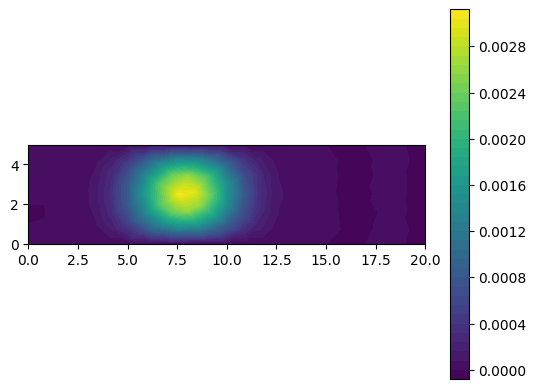

Solving linear variational problem.


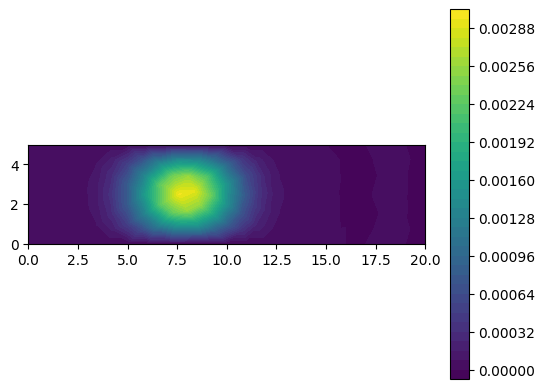

Solving linear variational problem.


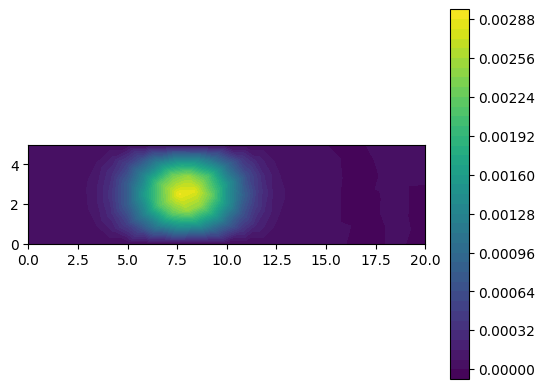

Solving linear variational problem.


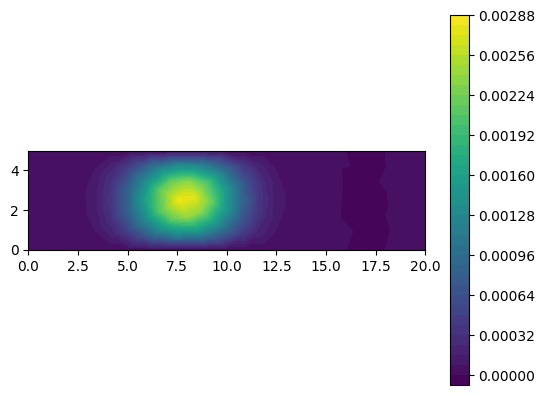

Solving linear variational problem.


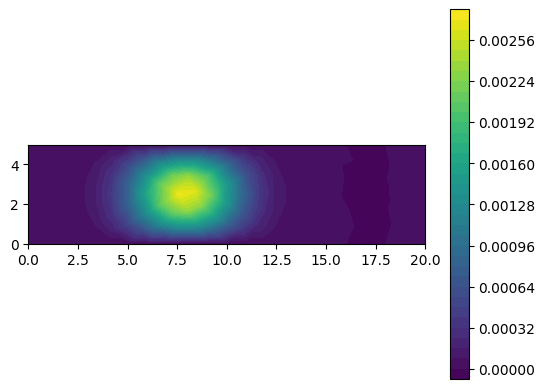

Solving linear variational problem.


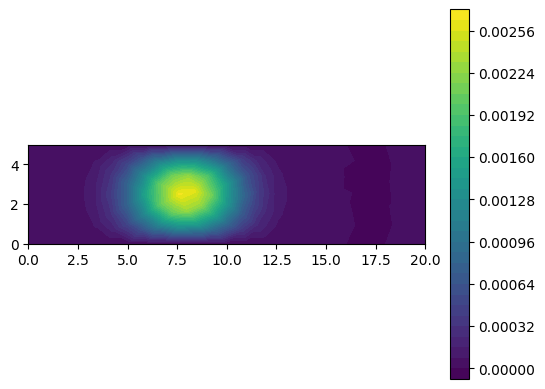

Solving linear variational problem.


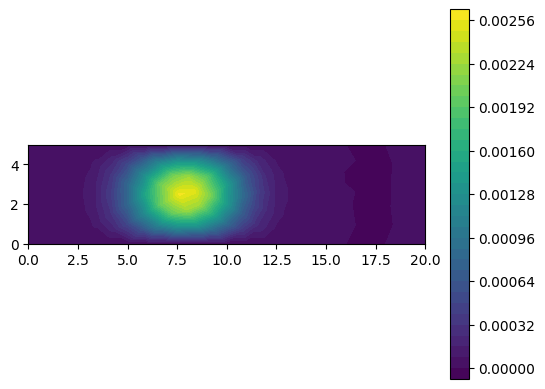

Solving linear variational problem.


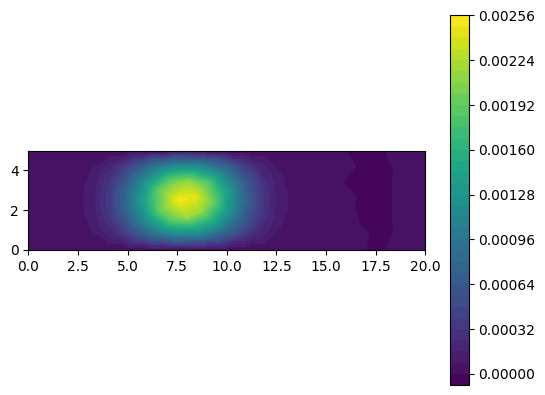

Solving linear variational problem.


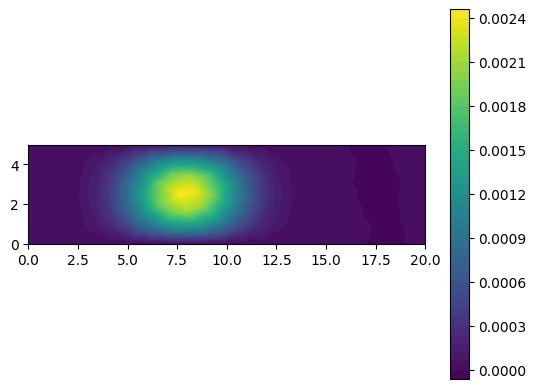

Solving linear variational problem.


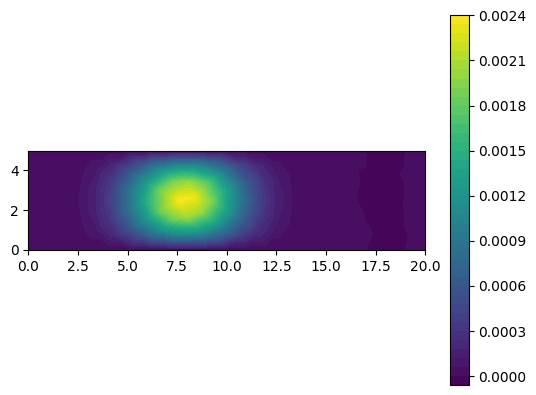

Solving linear variational problem.


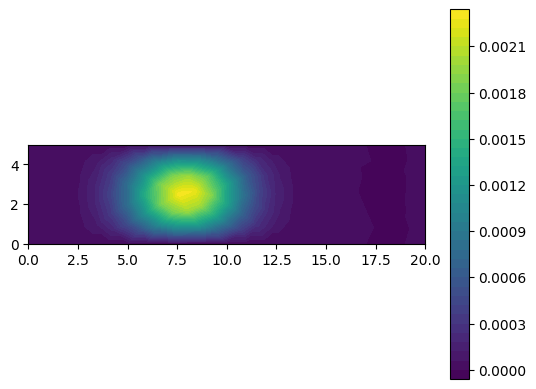

Solving linear variational problem.


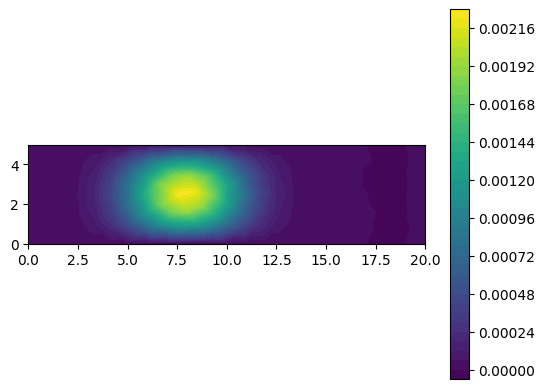

Solving linear variational problem.


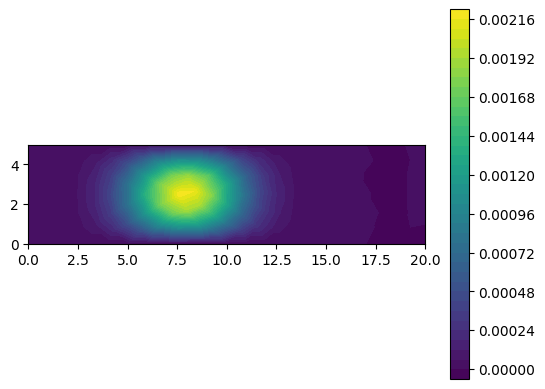

Solving linear variational problem.


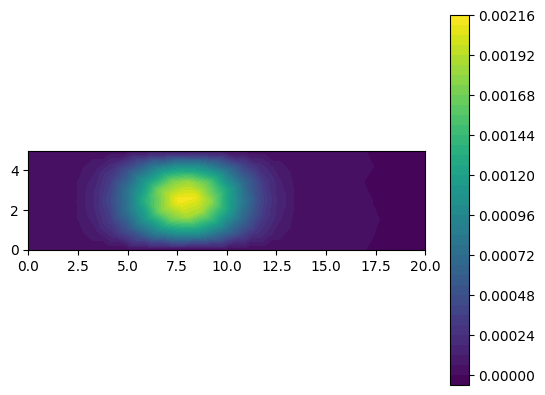

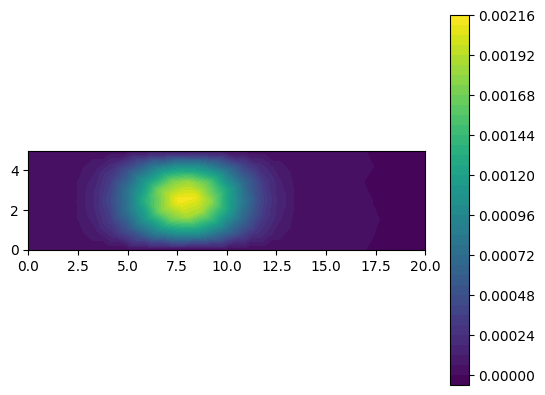

In [50]:
#diffusion of a gaussian function
heat_gaussian = gd.Heat(mesh_load,'Heat')
V = FunctionSpace(mesh_load.mesh,"CG",1)
k = Constant(1.0)
f = Constant(0.0)
bc = Constant(0.0)
u0 = Expression('exp(-a*pow(x[0]-8, 2) - a*pow(x[1]-2.5, 2))',degree=2, a=20)
dt = 2.0/ 50
T = 2.0
heat_gaussian.set_parameters(V,k,f,bc,u0,dt,T)
heat_gaussian.solve()
heat_gaussian.plot_solution()
data = gd.DataHeat(heat_gaussian,mesh_load)

In [51]:
# center_line = []
# for i in tags['interface']:
#     edge_coord =[]
#     for edge in edges(mesh):
#         if bounds.array()[edge.index()] == i:
#             for vertex in vertices(edge):
#                 coordinate = vertex.point().array()
#                 edge_coord.append(coordinate)

#     edge_coord = np.array(edge_coord)
#     center_line.append([(np.max(edge_coord[:,0])+np.min(edge_coord[:,0]))/2,(np.max(edge_coord[:,1])+np.min(edge_coord[:,1]))/2])

# print(center_line)

In [52]:
center_line = data.centerline()
dict, td_dict = data.nodes_data()
print(dict)

{'NodeId': [0, 1, 2, 3, 4]}


In [53]:
edges1, edges2 = data.create_edges()
print(edges1,edges2)

[0, 1, 2, 3] [1, 2, 3, 4]


In [54]:
len(list(td_dict.values())[0])#.shape[0]

5

In [55]:
graph = gg.generate_graph(dict,center_line,edges1,edges2)
gg.add_field(graph,td_dict,'flux')

In [56]:
graph.ndata

{'x': tensor([[ 0.0000,  2.5000],
        [ 5.0000,  2.5000],
        [10.0000,  2.5000],
        [15.0000,  2.5000],
        [20.0000,  2.5000]]), 'NodeId': tensor([0., 1., 2., 3., 4.]), 'flux': tensor([[[ 1.6770e-05,  1.6770e-05,  1.6770e-05,  1.6770e-05,  1.6770e-05,
           1.6770e-05,  1.6770e-05,  1.6770e-05,  1.6770e-05,  1.6770e-05,
           1.6770e-05,  1.6770e-05,  1.6770e-05,  1.6770e-05,  1.6770e-05,
           1.6770e-05,  1.6770e-05,  1.6770e-05,  1.6770e-05,  1.6770e-05,
           1.6770e-05,  1.6770e-05,  1.6770e-05,  1.6770e-05,  1.6770e-05,
           1.6770e-05,  1.6770e-05,  1.6770e-05,  1.6770e-05,  1.6770e-05,
           1.6770e-05,  1.6770e-05,  1.6770e-05,  1.6770e-05,  1.6770e-05,
           1.6770e-05,  1.6770e-05,  1.6770e-05,  1.6770e-05,  1.6770e-05,
           1.6770e-05,  1.6770e-05,  1.6770e-05,  1.6770e-05,  1.6770e-05,
           1.6770e-05,  1.6770e-05,  1.6770e-05,  1.6770e-05]],

        [[-1.5149e-03, -1.5149e-03, -1.5149e-03, -1.5149e-03, -1